4. Haga un modelo de clasificación, use la variable categórica que hizo con el precio de las
casas (barata, media y cara) como variable respuesta.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
# Cargar los datos
df = pd.read_csv("../dataset/train.csv")

# Variables predictoras (mismas usadas en modelos previos)
predictors = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'FullBath']
X = df[predictors]
y = df['SalePrice']

# División en conjunto de entrenamiento y prueba (mismo random_state para comparabilidad)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Categorizar SalePrice
y_class = pd.qcut(df['SalePrice'], q=3, labels=["barata", "media", "cara"])

# Escalar las variables predictoras para KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)

# Modelo KNN Clasificador
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_c, y_train_c)

# Predicción
y_pred_c = knn_clf.predict(X_test_c)

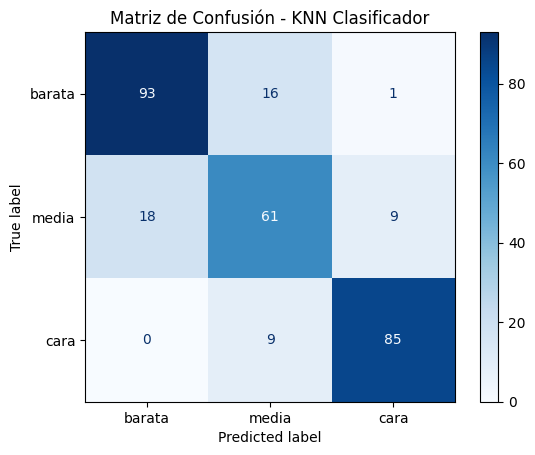

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de confusión
cm = confusion_matrix(y_test_c, y_pred_c, labels=["barata", "media", "cara"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["barata", "media", "cara"])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - KNN Clasificador")
plt.show()


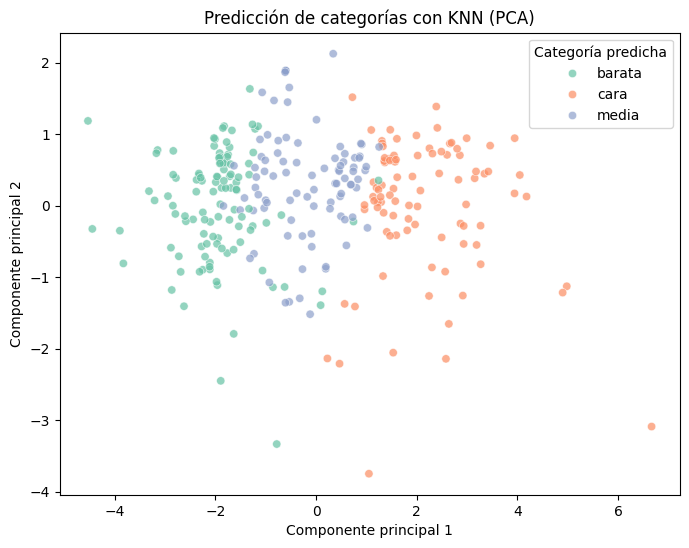

In [14]:
from sklearn.decomposition import PCA

# Reducir a 2 dimensiones para graficar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Separar el PCA para entrenamiento y prueba
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y_class, test_size=0.2, random_state=42)

# Volver a entrenar con PCA para visualización
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_pca, y_train_c)

# Predecir
y_pred_vis = knn_vis.predict(X_test_pca)

# Graficar
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test_pca[:,0], y=X_test_pca[:,1], hue=y_pred_vis, palette="Set2", alpha=0.7)
plt.title("Predicción de categorías con KNN (PCA)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend(title="Categoría predicha")
plt.show()

5. Utilice los modelos con el conjunto de prueba y determine la eficiencia del algoritmo para predecir y clasificar.


In [9]:
from sklearn.metrics import accuracy_score, classification_report

# Accuracy
accuracy = accuracy_score(y_test_c, y_pred_c)
print(f"Accuracy del modelo KNN Clasificador: {accuracy:.2f}")

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test_c, y_pred_c, target_names=["barata", "media", "cara"]))


Accuracy del modelo KNN Clasificador: 0.82

Reporte de Clasificación:
              precision    recall  f1-score   support

      barata       0.84      0.85      0.84       110
       media       0.89      0.90      0.90        94
        cara       0.71      0.69      0.70        88

    accuracy                           0.82       292
   macro avg       0.81      0.81      0.81       292
weighted avg       0.82      0.82      0.82       292



El modelo de clasificación KNN obtuvo un accuracy del 82%, lo que indica un buen desempeño general al clasificar las casas como baratas, medias o caras. Las clases barata y media fueron clasificadas con alta precisión y recall (ambos ≥ 0.84), mientras que la clase cara tuvo un desempeño más bajo (F1-score de 0.70), lo que sugiere que el modelo tiene más dificultad para distinguir correctamente esta categoría.

6. Haga un análisis de la eficiencia del modelo de clasificación usando una matriz de confusión.
Tenga en cuenta la efectividad, donde el algoritmo se equivocó más, donde se equivocó
menos y la importancia que tienen los errores.

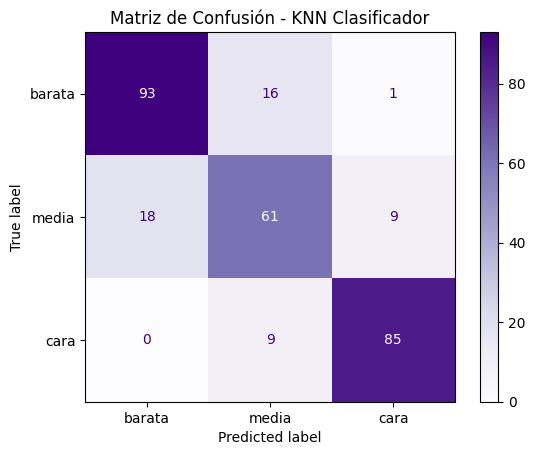

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de confusión
cm = confusion_matrix(y_test_c, y_pred_c, labels=["barata", "media", "cara"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["barata", "media", "cara"])
disp.plot(cmap='Purples', values_format='d')
plt.title("Matriz de Confusión - KNN Clasificador")
plt.show()

La matriz de confusión muestra que el modelo de KNN clasifica correctamente la mayoría de los casos en cada categoría. La mayor efectividad se observa en las casas baratas (93 aciertos de 110) y caras (85 aciertos de 94). El modelo se equivocó más al clasificar casas de precio medio, confundiendo 18 como baratas y 9 como caras.

Los errores menos frecuentes ocurrieron al confundir casas caras con medias (9 casos), pero nunca se confundieron casas caras como baratas, lo cual es positivo, ya que ese tipo de error podría tener un impacto más serio al subestimar significativamente el valor de una propiedad. En general, el modelo demuestra buena efectividad, con los errores concentrados en clases vecinas, lo que indica que la clasificación es razonablemente coherente.

7. Analice el modelo. ¿Cree que pueda estar sobreajustado?

El modelo de clasificación KNN no muestra señales claras de sobreajuste. Su rendimiento en el conjunto de prueba fue bueno, con un accuracy del 82% y una distribución razonable de errores, principalmente entre clases vecinas. Además, el hecho de que no haya confundido casas caras con baratas, y que los errores sean coherentes, indica que el modelo generaliza bien sin depender excesivamente de los datos de entrenamiento. Por lo tanto, se puede concluir que el modelo tiene un buen equilibrio entre ajuste y generalización.